**Install Required Packages**

In [ ]:
!pip install kaggle -q


**KAGGLE SETUP**

In [ ]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**DOWNLOAD DATASET**

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip



Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 19% 5.00M/25.7M [00:00<00:00, 41.8MB/s]
100% 25.7M/25.7M [00:00<00:00, 144MB/s] 
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


**Import necessary libraries**

In [ ]:
import pandas as pd
import re
import nltk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Load & Preprocess**

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub('<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['review'] = df['review'].apply(preprocess_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

**Vectorization**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X = tfidf_vectorizer.fit_transform(df['review']).toarray()
y = df['sentiment']

**Train/Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model**

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

**Evaluation**

In [ ]:
y_pred = model.predict(X_test)

print(f" Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f" Precision: {precision_score(y_test, y_pred):.4f}")
print(f" Recall: {recall_score(y_test, y_pred):.4f}")
print(f" F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.8920
 Precision: 0.8838
 Recall: 0.9045
 F1 Score: 0.8941

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



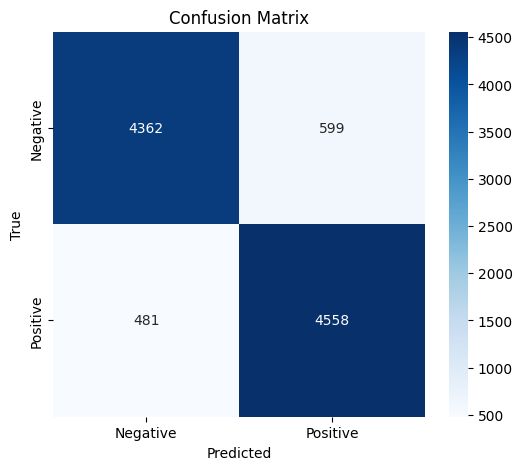

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Example Predictions**

In [ ]:
example_reviews = [
    "Absolutely loved the movie, brilliant acting and story.",
    "The movie was a complete waste of time. Terrible.",
    "A decent watch but nothing extraordinary."
]

for review in example_reviews:
    cleaned = preprocess_text(review)
    vec = tfidf_vectorizer.transform([cleaned]).toarray()
    pred = model.predict(vec)[0]
    print(f"'{review}' -> {'Positive' if pred else 'Negative'}")

'Absolutely loved the movie, brilliant acting and story.' -> Positive
'The movie was a complete waste of time. Terrible.' -> Negative
'A decent watch but nothing extraordinary.' -> Negative


**Save model**

In [ ]:
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)